## CVU Open and Reproducible Research Computing (Fall 2021)

### Assignment Notebook 1: Time Series Analysis

#### 1. Install the `nwis` library (if it's not installed already)

In [1]:
!pip install nwis

#### 2. Import the libraries required for the assignment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nwis import Nwis

output_pkl_file = 'streamflow_data_'

#### 3a. Choose one of the following USGS stream gages to analyze

Uncomment __one__ of the following `site_id` variable declarations. Leave `my_start_date` and `my_end_date` unchanged. All of the sites below have at least 40 years of record. Only the Cache la Poudre has less than 50. 

In [3]:
# site_id = '13185000' # Boise River at Twin Springs
# site_id = '13139510' # Big Wood River at Hailey
# site_id = '13246000' # North Fork of the Payette near Banks
site_id = '13042500' # Henry's Fork Near Island Park
# site_id = '06752260' # Cache La Poudre River near Fort Collins (CO)
#site_id = '09085000' # Roaring Fork River at Glenwood Springs (CO)

my_start_date = '1970-10-01'
my_end_date = '2020-09-30'

#### 4. Get the Flow Data

In [4]:
nwis_data = Nwis()
ds = nwis_data.get_data(site=site_id, start_date=my_start_date, end_date=my_end_date, data_type='dv')
ds

<xarray.Dataset>
Dimensions:   (datetime: 18263)
Coordinates:
  * datetime  (datetime) datetime64[ns] 1970-10-01 1970-10-02 ... 2020-09-30
Data variables:
    00060     (datetime) float64 669.0 658.0 658.0 658.0 ... 334.0 331.0 318.0
Attributes:
    site_name:         HENRYS FORK NR ISLAND PARK ID
    site_code:         13042500
    site_latitude:     44.41666667
    site_longitude:    -111.3947222
    site_altitude:     6225.0
    site_coord_datum:  NAD83

#### 5. Plot the Data

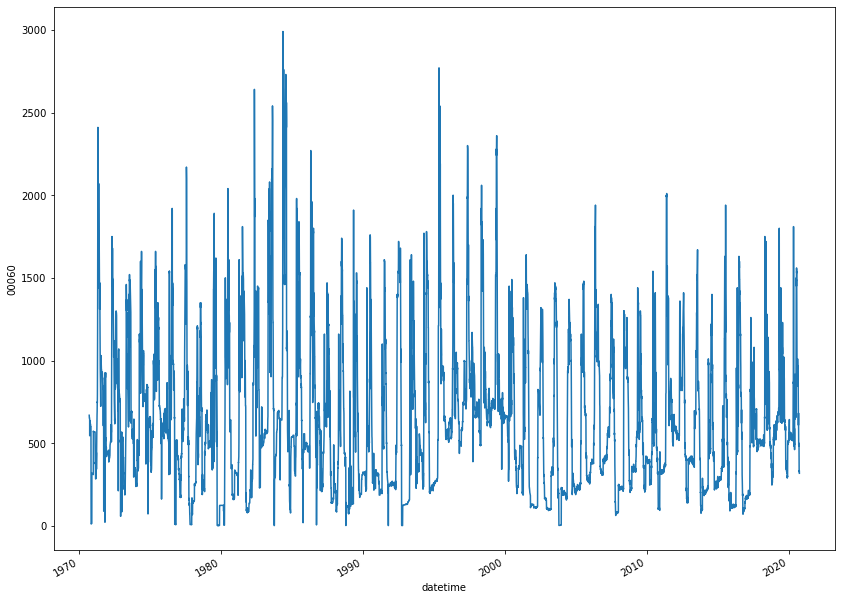

In [5]:
ds['00060'].plot(x='datetime', figsize=(14,10))

#### 6. Wrangle the Data into a `pandas` DataFrame object

Steps: 
* Get the dates and streamflow out of the object returned by our call to `Nwis.nwis()`
* Convert the streamflow in ft${}^3$/s to m${}^3$/s
* Create a water year vector so we can analyze data by water year
* Create a `pandas.DataFrame()` with the data

In [6]:
# Get the dates and convert them to a Pandas datetime object
dates = ds['datetime'].values
dates = pd.DatetimeIndex(dates) 

# Get the streamflow in ft^3/s as a numerical array and create one that is the same values but in m^3/s
Q_cfs = ds['00060'].values
Q_cms = Q_cfs / (3.2808**3)

# Create a water year vector by getting the year for every streamflow observation, checking the 
# associated month of that observation and then – if that month is October (10) or onward – add
# 1 to the water year
WY = ds['datetime.year'].values
WY[dates.month>=10] += 1

# Create a pandas DataFrame from these variables
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge_cfs'] = Q_cfs
df['Discharge_cms'] = Q_cms

# Rebuild the index to be able to use the pd.DataFrame.groupby() method
df.index = pd.to_datetime(df['Dates'],'%y-%m-%d')

# Save to a pickle file
# Question: What's going on with the file name? 
df.to_pickle(output_pkl_file+site_id+'.pkl')

#### 7. Compute the Seasonal Cycle and Plot

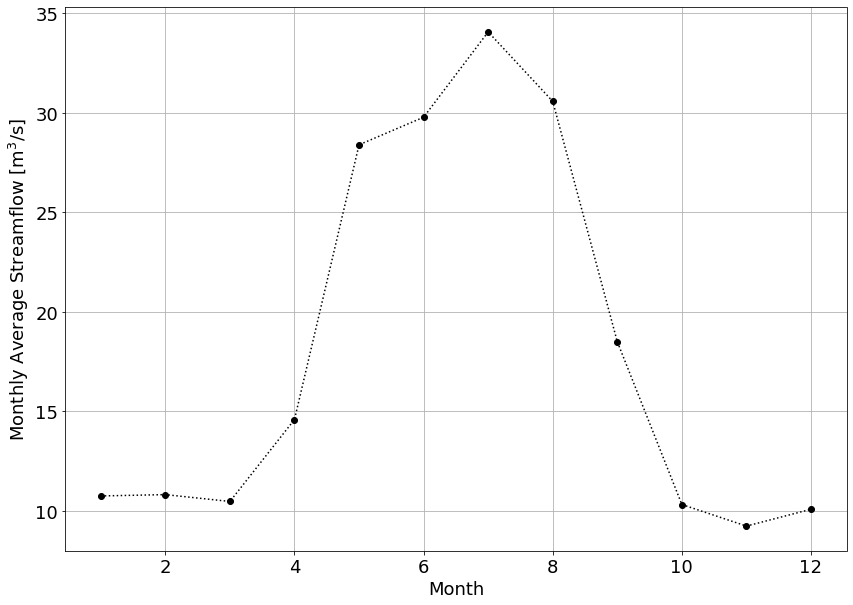

In [7]:
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot((np.arange(q_seasonal.size)+1),q_seasonal,'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [m${}^3$/s]')
plt.grid()
plt.show()

In [8]:
Q_ams = df['Discharge_cms'].groupby(by=WY).max()
Q_ams

1971    68.246090
1972    49.556289
1973    43.043177
1974    47.007680
1975    47.007680
1976    54.370329
1977    61.449799
1978    38.229137
1979    53.520792
1980    57.768474
1981    51.255362
1982    74.759202
1983    71.927414
1984    84.670460
1985    56.069402
1986    64.281587
1987    41.627283
1988    49.273111
1989    54.087150
1990    49.839468
1991    45.591786
1992    48.706753
1993    46.441323
1994    50.405826
1995    78.440527
1996    56.635759
1997    65.131123
1998    58.334832
1999    66.830196
2000    42.193641
2001    46.441323
2002    37.379601
2003    41.627283
2004    38.795495
2005    41.910462
2006    54.936686
2007    39.645031
2008    36.813244
2009    40.777747
2010    43.609535
2011    56.918938
2012    39.928210
2013    47.290859
2014    39.645031
2015    54.936686
2016    46.158144
2017    35.680528
2018    49.556289
2019    50.972183
2020    51.255362
Name: Discharge_cms, dtype: float64

In [9]:
Q_ams_sort = Q_ams.sort_values(ascending=False).values
Q_ams_sort

array([84.67046005, 78.44052654, 74.75920219, 71.92741422, 68.24608987,
       66.83019589, 65.13112312, 64.28158673, 61.44979877, 58.33483201,
       57.76847442, 56.91893803, 56.63575923, 56.06940164, 54.93668645,
       54.93668645, 54.37032886, 54.08715007, 53.52079247, 51.2553621 ,
       51.2553621 , 50.97218331, 50.40582572, 49.83946812, 49.55628933,
       49.55628933, 49.27311053, 48.70675294, 47.29085896, 47.00768016,
       47.00768016, 46.44132257, 46.44132257, 46.15814377, 45.59178618,
       43.60953461, 43.04317702, 42.19364063, 41.91046183, 41.62728304,
       41.62728304, 40.77774665, 39.92821026, 39.64503146, 39.64503146,
       38.79549507, 38.22913748, 37.37960109, 36.8132435 , 35.68052832])

In [10]:
p_ams = (np.arange(Q_ams.size)+1) / (Q_ams.size+1)
p_ams

array([0.01960784, 0.03921569, 0.05882353, 0.07843137, 0.09803922,
       0.11764706, 0.1372549 , 0.15686275, 0.17647059, 0.19607843,
       0.21568627, 0.23529412, 0.25490196, 0.2745098 , 0.29411765,
       0.31372549, 0.33333333, 0.35294118, 0.37254902, 0.39215686,
       0.41176471, 0.43137255, 0.45098039, 0.47058824, 0.49019608,
       0.50980392, 0.52941176, 0.54901961, 0.56862745, 0.58823529,
       0.60784314, 0.62745098, 0.64705882, 0.66666667, 0.68627451,
       0.70588235, 0.7254902 , 0.74509804, 0.76470588, 0.78431373,
       0.80392157, 0.82352941, 0.84313725, 0.8627451 , 0.88235294,
       0.90196078, 0.92156863, 0.94117647, 0.96078431, 0.98039216])

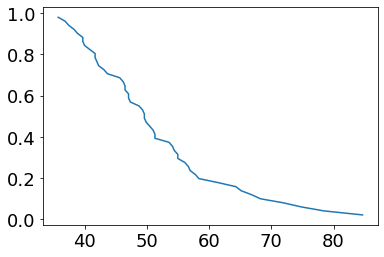

In [17]:
plt.plot(Q_ams_sort,p_ams)
plt.show()

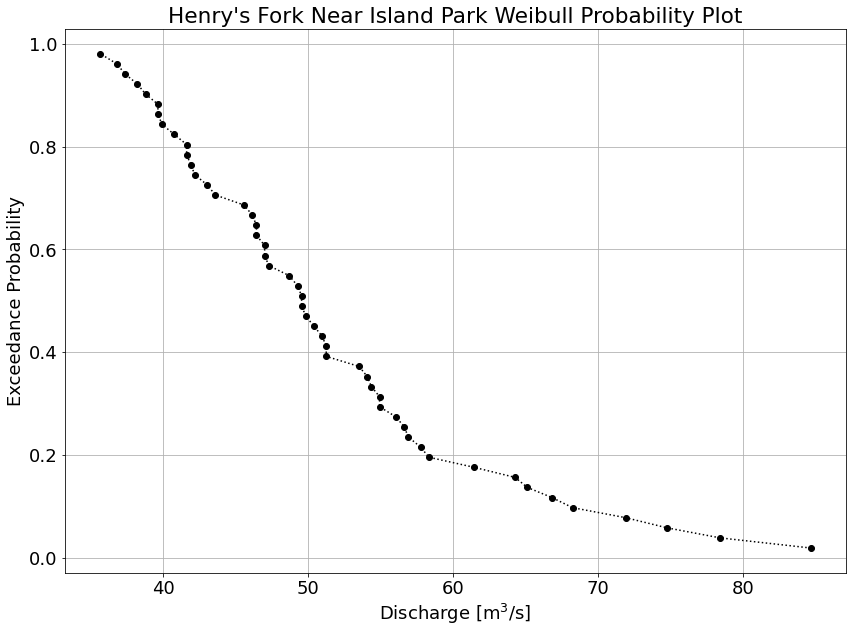

In [27]:
plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18})
plt.plot(Q_ams_sort,p_ams,'ko:')
plt.grid()

plt.title('Henry\'s Fork Near Island Park Weibull Probability Plot')
plt.ylabel('Exceedance Probability')
plt.xlabel('Discharge [m${}^3$/s]')
plt.show()



In [24]:
Q20 = np.interp(1/20,p_ams,Q_ams_sort)
Q50 = np.interp(1/50,p_ams,Q_ams_sort)

In [25]:
print('The 20-year flood event has a magnitude of {:.3f} m^3/s'.format(Q20))
print('The 50-year flood event has a magnitude of {:.3f} m^3/s'.format(Q50))

The 20-year flood event has a magnitude of 76.416 m^3/s
The 50-year flood event has a magnitude of 84.546 m^3/s
